<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
 

<strong>Objectives:</strong>
+ Estudiar los missings en la variable uds prevision venta
+ Discernir ceros (no venta) de verdaderos missings (datos faltantes)
    
    
<strong>Conclusions:</strong>
+ Funciona igual que la variable udsVenta, los missings es posible que sean 0

   
</div>

In [1]:
import os, sys

def get_root_path(search_word):
    """ Búsqueda hacia atrás de un directorio con nombre search_word. """
    cwd = os.getcwd()
    while str(os.getcwd()).split('/')[-1] != search_word:
        os.chdir("..")
        cwd = os.getcwd()
    return cwd

ROOT_DIR = get_root_path('TFM_StockForecast')

sys.path.insert(0, ROOT_DIR) # Poner en el primer lugar del PATH (evitar paquetes con mismos nombres en otros directorios)

In [19]:
import pandas as pd
from src.load_data import load_data

In [20]:
# PRINT EDA FOR STOCK DATA
# PRINT EDA FOR STOCK DATA
df = load_data()

variable = "udsprevisionempresa"

df.head()

===================  LOAD DATASET stock ====================
Reading CSV in data/raw/03_TablaStock.csv...
=============  CLEAN CSV  ==============
Set columns to lowcase.
Sort values by date.
Dropped duplicates. Rows dropped: 628.
============  CLEAN STOCK  =============
Dropped rows with data from products with no stock data or out-of-date (descatalogados). Rows dropped: 1784
[WARNING] Number of dates missings:                                83
[WARNING] Number of dates missings (droping sundays and festivos): 63
[WARNING] Stock data with different units for same product & data. Rows: 12666
Dataset stock loaded. Shape: (25518, 3)

===================  LOAD DATASET ventas ===================
Reading CSV in data/raw/01_TablaVentas.csv...
=============  CLEAN CSV  ==============
Set columns to lowcase.
Sort values by date.
Dropped duplicates. Rows dropped: 0.
============  CLEAN VENTAS  ============
Dropped rows with data from products with no stock data or out-of-date (descatalogados). 

,fecha,producto,udsstock,udsventa,udsprevisionempresa,promo,festivo,weekday
0,2019-06-05,1,18275.0,2833.0,102304.0,0.0,0.0,2
1,2019-06-05,10,2267.0,1874.0,36888.0,1.0,0.0,2
2,2019-06-05,11,2506.0,2755.0,31078.0,0.0,0.0,2
3,2019-06-05,12,1279.0,1161.0,33661.0,0.0,0.0,2
4,2019-06-05,13,2493.0,1603.0,32119.0,1.0,0.0,2


In [21]:
def filter_festivos(indf, only):
    df = indf.copy()
    if only:
        df = df.loc[(df.festivo == 1) | (df.weekday == 6)]
    else: 
        df = df.loc[(df.festivo != 1) & (df.weekday != 6)]
    return df
def perc(df1, df2):
    return round(100* df1.shape[0]/df2.shape[0])

In [22]:
# Declarar todos los df de estudio:

# ventas_byprod
ventas_byprod = pd.read_csv("data/clean/ventas_byprod.csv")


# df con registros con valores, con 0s y missings
exist = df.loc[~df[variable].isna()]
miss = df.loc[df[variable].isna()]
zeros = df.loc[df[variable] == 0]

# Missings sin contar las vacaciones
miss_noholiday = filter_festivos(miss, False)

# Missings por producto
byprod = miss_noholiday.groupby("producto")['fecha'].count().reset_index().sort_values("fecha", ascending=False)
byprod.columns = ["producto", "num_missings"]

# Missings por fecha
bydate = miss_noholiday.groupby("fecha")['producto'].count().reset_index().sort_values("producto", ascending=False)
bydate.columns = ["fecha", "num_missings"]

# Missings por dia de la semana
byday = miss.groupby("weekday")['producto'].count().reset_index().sort_values("producto", ascending=False)
byday.columns = ["weekday", "num_missings"]

# Analisis previo

In [23]:
print("Registros totales en dataset: {} ".format(df.shape[0]))
print("Productos totales: {} ".format(len(df.producto.unique())))
print("Días totales: {} ".format(len(df.fecha.unique())))
print("Dias totales de vacaciones: {} ".format(len(filter_festivos(df, True).fecha.unique())))

Registros totales en dataset: 21312 
Productos totales: 72 
Días totales: 296 
Dias totales de vacaciones: 50 


# Datos existentes en dias de vacaciones (festivos y domingos)

In [24]:
print("  Valores existentes en dias de vacaciones: {}"\
                .format(filter_festivos(exist, True).shape[0]))

print("  Dias de vacaciones con datos: {}"\
                .format(len(filter_festivos(exist, True).fecha.unique())))

filter_festivos(exist, True).fecha.unique()

  Valores existentes en dias de vacaciones: 985
  Dias de vacaciones con datos: 43


array(['2019-06-09T00:00:00.000000000', '2019-06-16T00:00:00.000000000',
       '2019-06-23T00:00:00.000000000', '2019-06-30T00:00:00.000000000',
       '2019-07-07T00:00:00.000000000', '2019-07-14T00:00:00.000000000',
       '2019-07-28T00:00:00.000000000', '2019-08-11T00:00:00.000000000',
       '2019-08-15T00:00:00.000000000', '2019-08-18T00:00:00.000000000',
       '2019-08-25T00:00:00.000000000', '2019-09-08T00:00:00.000000000',
       '2019-09-15T00:00:00.000000000', '2019-09-22T00:00:00.000000000',
       '2019-09-29T00:00:00.000000000', '2019-10-06T00:00:00.000000000',
       '2019-10-12T00:00:00.000000000', '2019-10-13T00:00:00.000000000',
       '2019-10-20T00:00:00.000000000', '2019-10-27T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-11-03T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-17T00:00:00.000000000',
       '2019-11-24T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-12-08

In [25]:
print("Dias festivos con datos:")
filter_festivos(exist, True).groupby("fecha")['producto'].count()

Dias festivos con datos:


fecha
2019-06-09     8
2019-06-16     4
2019-06-23     5
2019-06-30     4
2019-07-07     4
2019-07-14     3
2019-07-28     9
2019-08-11     9
2019-08-15    70
2019-08-18     9
2019-08-25     9
2019-09-08    11
2019-09-15    10
2019-09-22    21
2019-09-29    19
2019-10-06    21
2019-10-12    38
2019-10-13    24
2019-10-20    30
2019-10-27    20
2019-11-01    71
2019-11-03    20
2019-11-10    19
2019-11-17    12
2019-11-24     6
2019-12-01    14
2019-12-06    71
2019-12-08    14
2019-12-09    71
2019-12-15    16
2019-12-22    16
2019-12-25    71
2019-12-29    16
2020-01-01    71
2020-01-05    29
2020-01-06    71
2020-01-12    26
2020-02-02     3
2020-02-09     8
2020-02-16     8
2020-02-23     8
2020-03-01     8
2020-03-08     8
Name: producto, dtype: int64

¿Porqué tienen datos estos festivos?

# Datos perdidos en el total y sin contar las vacaciones

In [26]:
print("  Valores missings in udsventa:                                                              {} ({}%)"\
                .format(miss.shape[0], perc(miss, df)))

print("  Valores con ceros in udsventa:                                                             {} ({}%)"\
                .format(zeros.shape[0], perc(zeros, df)))

print("  Valores missings in udsventa sin domingos y festivos:                                      {} ({}%)"\
                .format(miss_noholiday.shape[0], perc(miss_noholiday, df)))

print("  Valores missings in udsventa sin domingos y festivos y con datos anteriores al 2020-03-23: {} ({}%)"\
                .format(miss_noholiday.loc[miss_noholiday.fecha < '2020-03-23'].shape[0], perc(miss_noholiday, df)))

  Valores missings in udsventa:                                                              4958 (23%)
  Valores con ceros in udsventa:                                                             120 (1%)
  Valores missings in udsventa sin domingos y festivos:                                      2343 (11%)
  Valores missings in udsventa sin domingos y festivos y con datos anteriores al 2020-03-23: 2337 (11%)


In [27]:
zeros

,fecha,producto,udsstock,udsventa,udsprevisionempresa,promo,festivo,weekday
274,2019-06-08,80,NaN,NaN,0.0,0.0,0.0,5
307,2019-06-09,3,NaN,NaN,0.0,1.0,0.0,6
778,2019-06-15,80,NaN,1476.0,0.0,0.0,0.0,5
1282,2019-06-22,80,NaN,NaN,0.0,0.0,0.0,5
1775,2019-06-29,64,NaN,1001.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...
21042,2020-03-23,29,NaN,NaN,0.0,0.0,0.0,0
21091,2020-03-23,95,NaN,NaN,0.0,0.0,0.0,0
21114,2020-03-24,29,NaN,NaN,0.0,0.0,0.0,1
21186,2020-03-25,29,NaN,NaN,0.0,0.0,0.0,2


# Datos perdidos por producto

In [28]:
print("   Missings en udsventa sin domingos y festivos para {} productos de {} totales."\
                .format(byprod.loc[byprod.num_missings != 0].shape[0], byprod.shape[0]))
print("   5 productos con más missings:")
byprod.head()

   Missings en udsventa sin domingos y festivos para 72 productos de 72 totales.
   5 productos con más missings:


,producto,num_missings
67,95,127
58,80,94
71,99,86
62,88,55
63,89,55


# Datos perdidos por fecha

In [29]:
print("   Missings en udsventa sin domingos y festivos para {} fechas de {} totales."\
                .format(bydate.loc[bydate.num_missings != 0].shape[0], bydate.shape[0]))
print("Dias sin ningun dato (de los no festivos):")
bydate.loc[bydate.num_missings == 72].sort_values("fecha")

   Missings en udsventa sin domingos y festivos para 170 fechas de 170 totales.
Dias sin ningun dato (de los no festivos):


,fecha,num_missings
4,2019-07-03,72
13,2019-07-20,72
18,2019-07-30,72
19,2019-07-31,72
20,2019-08-01,72
21,2019-08-02,72
22,2019-08-03,72
23,2019-08-05,72
24,2019-08-06,72
25,2019-08-07,72


#### Los missings del 23 al 26 de marzo de 2020 son missings reales, los de verano es posible que no haya ventas.

In [30]:
print("   5 fechas con más missings (sin que sean todos):")
bydate.loc[bydate.num_missings != 72].head()

   5 fechas con más missings (sin que sean todos):


,fecha,num_missings
5,2019-07-04,68
33,2019-09-02,64
14,2019-07-22,45
12,2019-07-19,42
48,2019-10-19,34


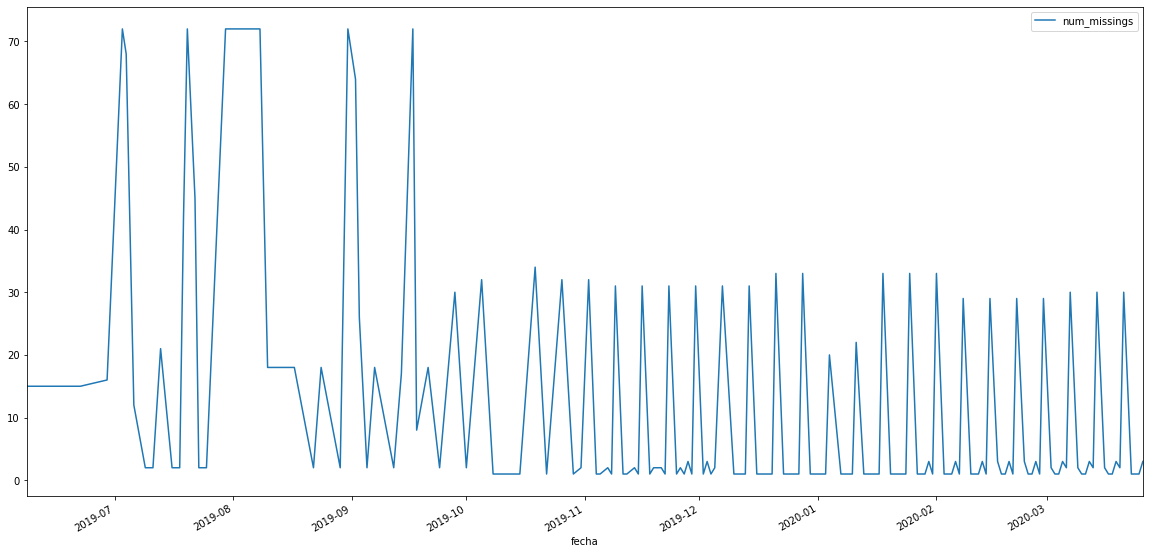

In [31]:
bydate.sort_values("fecha").set_index("fecha").plot(figsize=(20,10))

# Missings por dia de la semana (contando festivos)

In [32]:
byday.sort_values("weekday")

,weekday,num_missings
0,0,209
1,1,281
2,2,242
3,3,275
4,4,138
5,5,1240
6,6,2573
